In [1]:
import numpy as np
import pandas as pd
import LaviRot as lr
import matplotlib.pyplot as plt
from LaviRot.materials import steel
np.set_printoptions(precision=1, linewidth=300)
%matplotlib inline

In [2]:
# n_elements = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 80]
n_elements = [6]
speed = 523.6

In [3]:
shaft_od = 0.08
shaft_id = 0.03
shaft_len = 1.2

In [4]:
steel_ex = lr.Material('steel_ex', rho=7800, E=200e9, Poisson=0.27)

In [5]:
rotors_wn = np.zeros((6, len(n_elements)))
for i, n_el in enumerate(n_elements):
    bearing0 = lr.BearingElement(0, kxx=1e18, cxx=0)
    bearing1 = lr.BearingElement(n_el, kxx=1e18, cxx=0)
    bearings = [bearing0, bearing1]

    shaft = [lr.ShaftElement(shaft_len/n_el, shaft_id, shaft_od, steel_ex, n=i)
             for i in range(n_el)]
    disk0 = lr.DiskElement(n_el//2, steel_ex, width=0.08, i_d=shaft_od, o_d=0.4)
    rotor = lr.Rotor(shaft, [disk0], bearings, w=speed)
    rotors_wn[:, i] = rotor.wd[:6]

In [6]:
rotors_wn

array([[  339.5],
       [  339.5],
       [ 1539.5],
       [ 2215.3],
       [ 4921.9],
       [ 4921.9]])

In [7]:
pd.Series(rotor.evalues)

0        (-0.948252905824+339.536672685j)
1         (0.948252905717+339.536672764j)
2      (7.70753665914e-09+1539.46753181j)
3     (-9.28589736571e-09+2215.31438637j)
4          (6.30652125211+4921.89750422j)
5          (-6.30652125498+4921.8975042j)
6       (2.68340599741e-10+5251.7837535j)
7     (-1.60652453493e-09+5534.06460695j)
8      (-6.1362220363e-09+15463.3678962j)
9      (3.82715370507e-09+15531.3643729j)
10     (4.16207202383e-09+15554.2446127j)
11      (-6.80605422628e-09+15593.48018j)
12    (-2.87988918598e-09+35618.6069852j)
13     (3.61718491043e-10+35751.8688452j)
14     (7.07339036302e-10+35792.0474296j)
15    (-3.11314090305e-09+35921.3216299j)
16     (-8.14907252789e-10+68406.681527j)
17    (-1.36275601914e-09+68625.7802757j)
18    (-1.86114450563e-09+68646.0852197j)
19    (-1.24418875203e-09+68864.3811477j)
20    (-4.05086616334e-09+121032.771737j)
21    (-9.53150447458e-10+121115.880094j)
22    (-2.07217287773e-09+121470.488615j)
23    (-5.08387142847e-09+121553.7

In [10]:
len(rotor.A())

56

In [117]:
ref = rotors_wn[:, -1].reshape(6, 1)
error = np.abs((rotors_wn - ref) / ref)

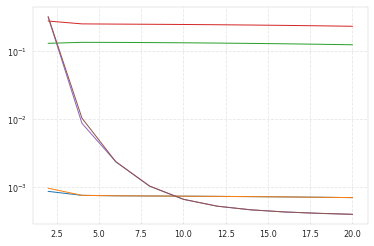

In [119]:
fig, ax = plt.subplots()
ax.semilogy(n_elements[:-1], error[:, :-1].T)

In [101]:
(error[:, :-1]).shape

(6, 9)

In [103]:
ref

array([[  339.5],
       [  339.5],
       [ 1815.9],
       [ 1815.9],
       [ 4912.1],
       [ 4912.1]])

In [108]:
rotors_wn[:, :6]

array([[  339.6,   339.5,   339.5,   339.5,   339.5,   339.5],
       [  339.6,   339.5,   339.5,   339.5,   339.5,   339.5],
       [ 1546.7,  1538.8,  1539.5,  1540.8,  1542.5,  1544.7],
       [ 2262.9,  2218.6,  2215.3,  2212.7,  2209.7,  2206. ],
       [ 6451. ,  4952.9,  4921.9,  4915.3,  4913.5,  4912.8],
       [ 6470.9,  4961.1,  4921.9,  4915.3,  4913.5,  4912.8]])

In [109]:
error[:, :6]

array([[  9.4e-05,   1.4e-05,   2.3e-05,   2.5e-05,   2.5e-05,   2.5e-05],
       [  1.9e-04,   1.4e-05,   2.3e-05,   2.5e-05,   2.5e-05,   2.5e-05],
       [  1.5e-01,   1.5e-01,   1.5e-01,   1.5e-01,   1.5e-01,   1.5e-01],
       [  2.5e-01,   2.2e-01,   2.2e-01,   2.2e-01,   2.2e-01,   2.1e-01],
       [  3.1e-01,   8.3e-03,   2.0e-03,   6.6e-04,   2.8e-04,   1.5e-04],
       [  3.2e-01,   1.0e-02,   2.0e-03,   6.6e-04,   2.8e-04,   1.5e-04]])

In [ ]:
rotor.e